# EDA

In [124]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns

In [212]:
df_labels = pd.read_csv('data/label.csv')
print(f"labels:{df_labels.shape}")

labels:(400000, 3)


In [213]:
df_members = pd.read_csv('data/members_filtered.csv')
df_transactions = pd.read_csv('data/transactions_filtered.csv')
print(f"members:{df_members.shape}")
print(f"transactions:{df_transactions.shape}")

members:(400000, 7)
transactions:(4812931, 10)


In [214]:
df_logs = pd.read_csv('data/user_logs_filtered.csv')
print(f"logs:{df_logs.shape}")

logs:(79102442, 10)


In [215]:
df_labels = df_labels.iloc[:, 1:]
df_labels

,msno,label
0,JdmXXzLgL8NqEDBKXXPRSN6+H72vtMgzO7WQYfv3e34=,1
1,wzQL52h6U5ujx8F+zztPyN4bAzEVp94oZDK22HuiSmM=,0
2,5trzY3e8yDybNyTfz/teRrsPBGNtcVn5EKZfgYicAYs=,0
3,CBCUZZBicQhRyjmGuYT+EnzamYaO6PWrd7tSUsZtGzk=,2
4,lA0oHXFDBFn3mFA+1w8m4N/J8fBTiGqPHbhZj5OTP34=,2
...,...,...
399995,78awLLRmNMqpEC3ey/6bMfP1OXLaHBfZ4ms3AiiQCZQ=,0
399996,azPF5rd82ITb7eBTeKkg3VpA8GJzVnk6VKHauDMGoaQ=,0
399997,aADRhKqUWBgZlEJ1zxxS24ZpmkaM6as5PXPhU/2BytM=,0
399998,eZNfGSnM3dsQFPwXnvFuBCxSwd+wxdd74/z9YFPJc6w=,0


In [216]:
df_members = df_members.iloc[:, 1:]
df_members

,msno,city,bd,gender,registered_via,registration_init_time
0,JdmXXzLgL8NqEDBKXXPRSN6+H72vtMgzO7WQYfv3e34=,15,0,NaN,9,20141231
1,wzQL52h6U5ujx8F+zztPyN4bAzEVp94oZDK22HuiSmM=,22,23,male,3,20150608
2,5trzY3e8yDybNyTfz/teRrsPBGNtcVn5EKZfgYicAYs=,1,0,NaN,7,20120425
3,CBCUZZBicQhRyjmGuYT+EnzamYaO6PWrd7tSUsZtGzk=,6,27,female,9,20150124
4,lA0oHXFDBFn3mFA+1w8m4N/J8fBTiGqPHbhZj5OTP34=,1,0,NaN,7,20140625
...,...,...,...,...,...,...
399995,78awLLRmNMqpEC3ey/6bMfP1OXLaHBfZ4ms3AiiQCZQ=,1,0,female,3,20150530
399996,azPF5rd82ITb7eBTeKkg3VpA8GJzVnk6VKHauDMGoaQ=,1,0,NaN,9,20150928
399997,aADRhKqUWBgZlEJ1zxxS24ZpmkaM6as5PXPhU/2BytM=,1,0,NaN,4,20160209
399998,eZNfGSnM3dsQFPwXnvFuBCxSwd+wxdd74/z9YFPJc6w=,12,69,female,3,20141225


In [ ]:
# merging label dataset with members dataset
label_members = pd.merge(df_labels, df_members, on='msno', how='left')
label_members

,msno,label,city,bd,gender,registered_via,registration_init_time
0,JdmXXzLgL8NqEDBKXXPRSN6+H72vtMgzO7WQYfv3e34=,1,15,0,NaN,9,20141231
1,wzQL52h6U5ujx8F+zztPyN4bAzEVp94oZDK22HuiSmM=,0,22,23,male,3,20150608
2,5trzY3e8yDybNyTfz/teRrsPBGNtcVn5EKZfgYicAYs=,0,1,0,NaN,7,20120425
3,CBCUZZBicQhRyjmGuYT+EnzamYaO6PWrd7tSUsZtGzk=,2,6,27,female,9,20150124
4,lA0oHXFDBFn3mFA+1w8m4N/J8fBTiGqPHbhZj5OTP34=,2,1,0,NaN,7,20140625
...,...,...,...,...,...,...,...
399995,78awLLRmNMqpEC3ey/6bMfP1OXLaHBfZ4ms3AiiQCZQ=,0,1,0,female,3,20150530
399996,azPF5rd82ITb7eBTeKkg3VpA8GJzVnk6VKHauDMGoaQ=,0,1,0,NaN,9,20150928
399997,aADRhKqUWBgZlEJ1zxxS24ZpmkaM6as5PXPhU/2BytM=,0,1,0,NaN,4,20160209
399998,eZNfGSnM3dsQFPwXnvFuBCxSwd+wxdd74/z9YFPJc6w=,0,12,69,female,3,20141225


In [218]:
label_members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   msno                    400000 non-null  object
 1   label                   400000 non-null  int64 
 2   city                    400000 non-null  int64 
 3   bd                      400000 non-null  int64 
 4   gender                  175620 non-null  object
 5   registered_via          400000 non-null  int64 
 6   registration_init_time  400000 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 21.4+ MB


In [219]:
# getting features wise null values (number)
label_members.isnull().sum()

msno                           0
label                          0
city                           0
bd                             0
gender                    224380
registered_via                 0
registration_init_time         0
dtype: int64

label
0    203870
2    180959
1     15171
Name: count, dtype: int64
label
0    0.509675
2    0.452398
1    0.037928
Name: proportion, dtype: float64


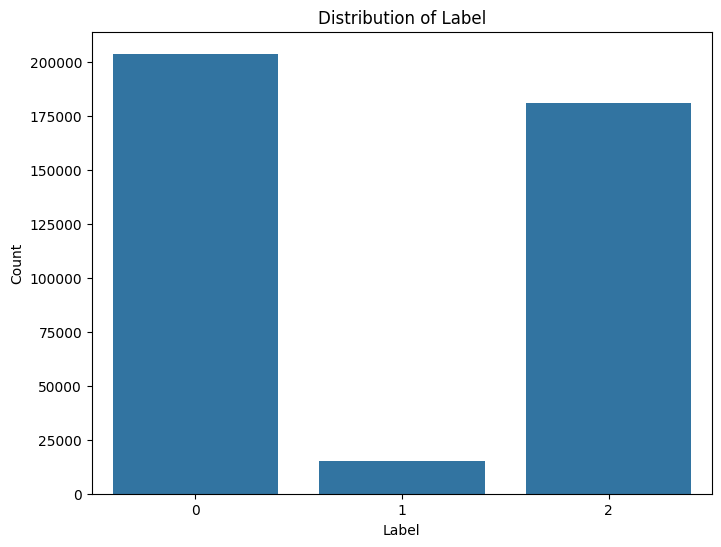

In [ ]:
# label
print(label_members['label'].value_counts())
print(label_members['label'].value_counts(normalize=True))

plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=label_members)
plt.title('Distribution of Label')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [221]:
label_members['gender'].fillna('unknown', inplace=True)
label_members['gender'].value_counts(dropna=False)

C:\Users\suxin\AppData\Local\Temp\ipykernel_7112\3829374583.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  label_members['gender'].fillna('unknown', inplace=True)


gender
unknown    224380
male        90170
female      85450
Name: count, dtype: int64

gender
unknown    224380
male        90170
female      85450
Name: count, dtype: int64
gender
unknown    0.560950
male       0.225425
female     0.213625
Name: proportion, dtype: float64


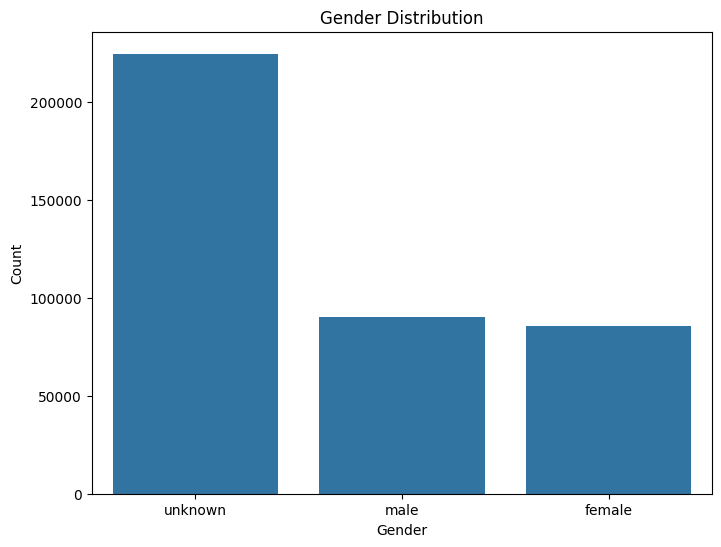

In [ ]:
# gender
print(label_members['gender'].value_counts(dropna=False))
print(label_members['gender'].value_counts(normalize=True, dropna=False))

plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=label_members)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [ ]:
# age
print(label_members['bd'].describe())

count    400000.000000
mean         13.481205
std          22.797361
min       -5978.000000
25%           0.000000
50%           0.000000
75%          27.000000
max        1958.000000
Name: bd, dtype: float64


In [ ]:
print("Age < 0:")
print(len(label_members[label_members['bd'] < 0]))

print("Age > 100:")
print(len(label_members[label_members['bd'] > 100]))

Age < 0:
59
Age > 100:
240


In [225]:
label_members = label_members[(label_members['bd'] >= 0) & (label_members['bd'] <= 100)]
print(label_members['bd'].describe())

count    399701.000000
mean         13.312954
std          16.203152
min           0.000000
25%           0.000000
50%           0.000000
75%          27.000000
max         100.000000
Name: bd, dtype: float64


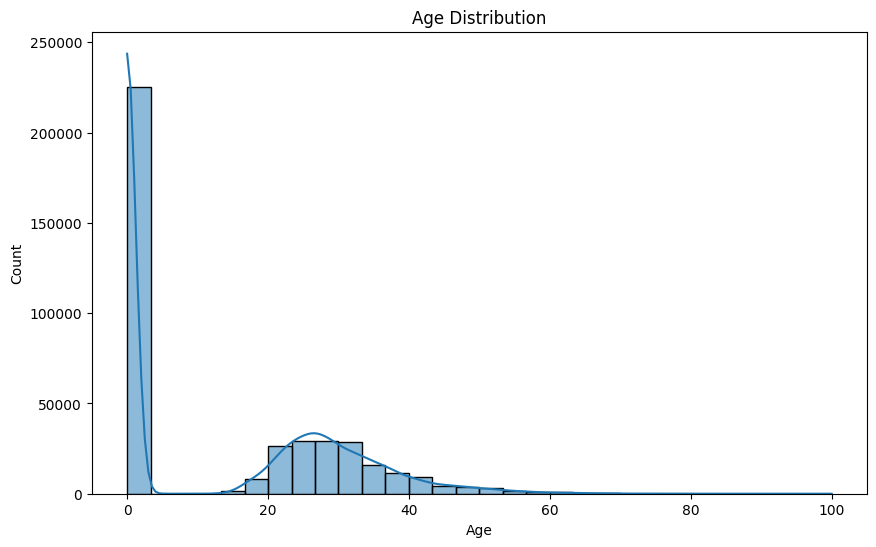

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=label_members, x='bd', bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

C:\Users\suxin\AppData\Local\Temp\ipykernel_7112\3508136106.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label_members['bd'] = label_members['bd'].apply(lambda x: -1 if x == 0 else x)


count    174684.000000
mean         30.461868
std           8.851184
min           1.000000
25%          24.000000
50%          29.000000
75%          35.000000
max         100.000000
Name: bd, dtype: float64


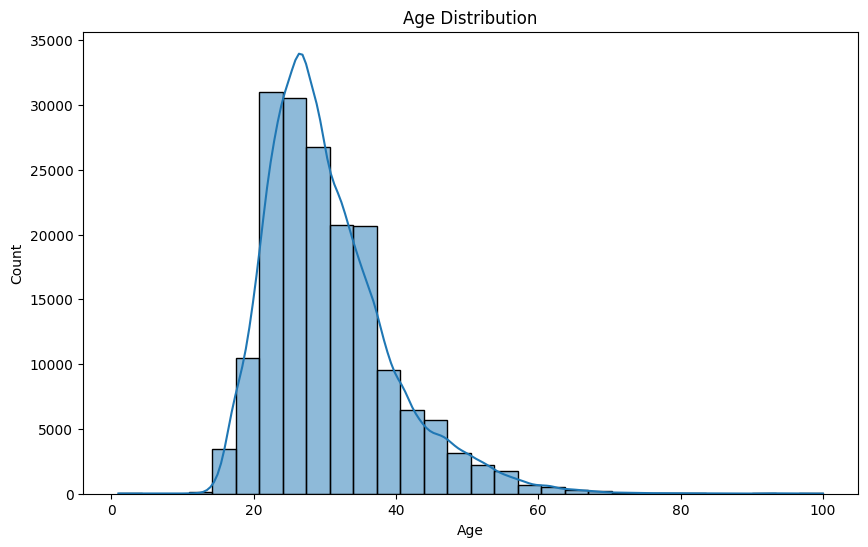

In [ ]:
label_members['bd'] = label_members['bd'].apply(lambda x: -1 if x == 0 else x)

label_members_filtered = label_members[label_members['bd'] != -1]
print(label_members_filtered['bd'].describe())

plt.figure(figsize=(10, 6))
sns.histplot(data=label_members_filtered, x='bd', bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

registered_via
7     179284
9     106750
3      61145
4      51096
13       839
11       370
8         62
5         37
17        32
2         24
19        17
6         16
16        14
14        11
10         3
1          1
Name: count, dtype: int64
registered_via
7     0.448545
9     0.267075
3     0.152977
4     0.127836
13    0.002099
11    0.000926
8     0.000155
5     0.000093
17    0.000080
2     0.000060
19    0.000043
6     0.000040
16    0.000035
14    0.000028
10    0.000008
1     0.000003
Name: proportion, dtype: float64


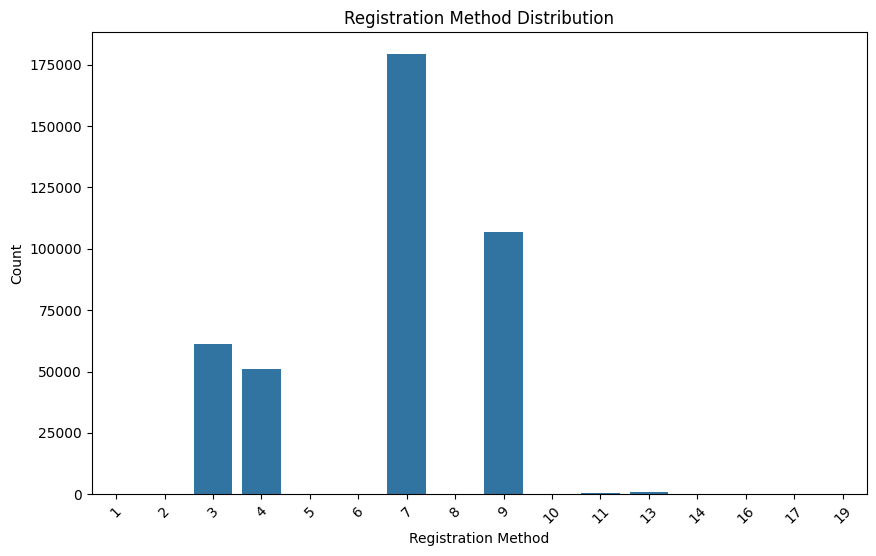

In [ ]:
# register
print(label_members['registered_via'].value_counts())
print(label_members['registered_via'].value_counts(normalize=True))

plt.figure(figsize=(10, 6))
sns.countplot(x='registered_via', data=label_members)
plt.title('Registration Method Distribution')
plt.xlabel('Registration Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

C:\Users\suxin\AppData\Local\Temp\ipykernel_7112\1229279007.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label_members['registration_init_time']=pd.to_datetime(label_members['registration_init_time'], format='%Y%m%d')


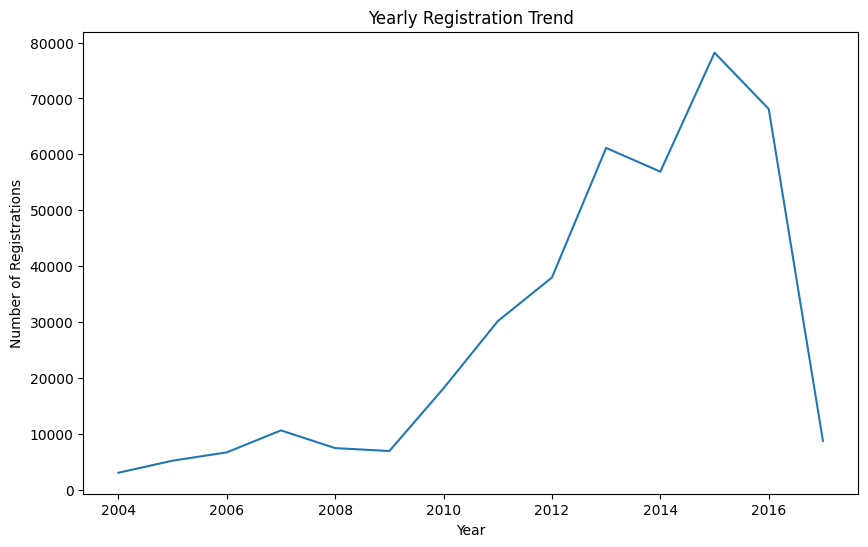

In [ ]:
# registration time
label_members['registration_init_time']=pd.to_datetime(label_members['registration_init_time'], format='%Y%m%d')
yearly_registration = label_members['registration_init_time'].dt.year.value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_registration.index, y=yearly_registration.values)
plt.title('Yearly Registration Trend')
plt.xlabel('Year')
plt.ylabel('Number of Registrations')
plt.show()

In [234]:
df_transactions = df_transactions.iloc[:, 1:]
df_transactions

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,M1C56ijxozNaGD0t2h68PnH2xtx5iO5iR2MVYQB6nBI=,39,30,149,149,1,20150930,20151128,0
1,pMVjPLgVknaJYm9L0xUwxA2jmhpK7gfhGnsmmwX1mrE=,39,30,149,149,1,20150930,20151118,0
2,TZVCT9pCufI/AWjrG9s2fLbkpDI/8jRDAI6+PfQmTDs=,39,30,149,149,1,20150930,20151124,0
3,iFxPpElVK6kXnZbuh5Di3ITpHtrkGNM73WbJG+zy05o=,39,30,149,149,1,20150930,20151122,0
4,vma4rQzDa/l4Wb/MyNxzI2YDuJIXlpL5xcw32BxaKLk=,39,30,149,149,1,20150930,20151123,0
...,...,...,...,...,...,...,...,...,...
4812926,zoYK3+OC4zVwgHY+p3G4JK258ig4kESFGNSMgHDnauc=,39,30,149,149,1,20170228,20170411,0
4812927,zqsH77C0tnmJzRXyJ2EGECaaUOE0AT9rrO/BaGAD9is=,41,30,129,129,1,20170310,20170310,1
4812928,zrG9oI7hiVAhL45pBQvw1obf7O6737BnnMnFIyQTudU=,41,30,99,99,1,20170318,20170418,0
4812929,zs1Oc+7NwsWhcCeZ287H+lUakejR2LdNKVLPaQcUTJ8=,37,30,149,149,1,20170313,20170412,0


In [237]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812931 entries, 0 to 4812930
Data columns (total 9 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   msno                    object
 1   payment_method_id       int64 
 2   payment_plan_days       int64 
 3   plan_list_price         int64 
 4   actual_amount_paid      int64 
 5   is_auto_renew           int64 
 6   transaction_date        int64 
 7   membership_expire_date  int64 
 8   is_cancel               int64 
dtypes: int64(8), object(1)
memory usage: 330.5+ MB


In [ ]:
missing_values = df_transactions.isnull().sum()
print(missing_values)

msno                      0
payment_method_id         0
payment_plan_days         0
plan_list_price           0
actual_amount_paid        0
is_auto_renew             0
transaction_date          0
membership_expire_date    0
is_cancel                 0
dtype: int64


payment_method_id
41    2722957
40     810264
39     320123
37     247323
36     231681
33      97224
38      91649
34      67443
30      42368
35      33654
31      31755
32      26760
27      22894
29      21586
23       9145
24       8469
16       4718
18       3742
28       3718
21       3014
19       2466
20       1780
22       1754
26       1680
14        915
25        722
12        648
17        584
13        573
15        508
10        282
11        262
8         131
6          55
5          47
3          25
7           6
2           5
4           1
Name: count, dtype: int64
payment_method_id
41    5.657586e-01
40    1.683515e-01
39    6.651311e-02
37    5.138719e-02
36    4.813720e-02
33    2.020058e-02
38    1.904224e-02
34    1.401287e-02
30    8.802952e-03
35    6.992413e-03
31    6.597851e-03
32    5.560022e-03
27    4.756769e-03
29    4.485001e-03
23    1.900090e-03
24    1.759635e-03
16    9.802758e-04
18    7.774888e-04
28    7.725022e-04
21    6.262296e-04
19    5.1236

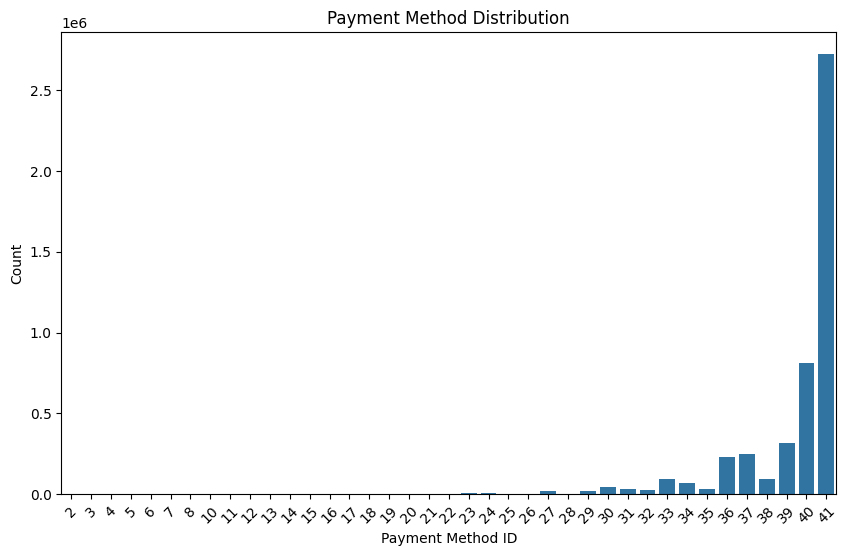

In [ ]:
# payment method
print(df_transactions['payment_method_id'].value_counts())
print(df_transactions['payment_method_id'].value_counts(normalize=True))

plt.figure(figsize=(10, 6))
sns.countplot(x='payment_method_id', data=df_transactions)
plt.title('Payment Method Distribution')
plt.xlabel('Payment Method ID')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

is_auto_renew
1    4537217
0     275714
Name: count, dtype: int64
is_auto_renew
1    0.942714
0    0.057286
Name: proportion, dtype: float64


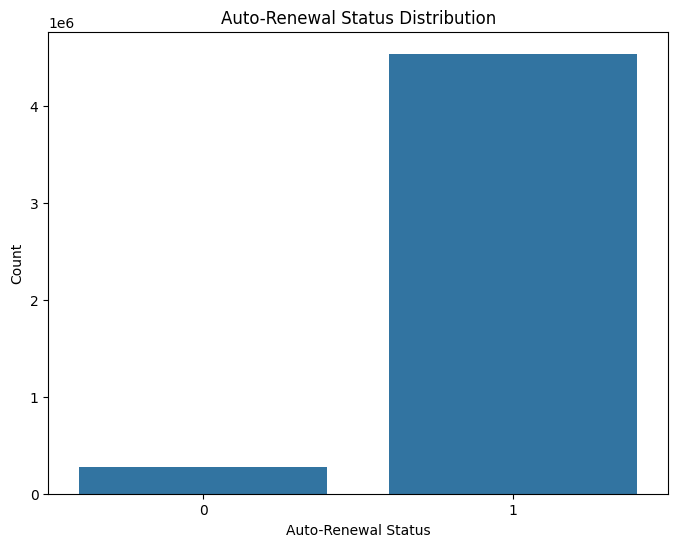

In [ ]:
# auto renew
print(df_transactions['is_auto_renew'].value_counts())
print(df_transactions['is_auto_renew'].value_counts(normalize=True))

plt.figure(figsize=(8, 6))
sns.countplot(x='is_auto_renew', data=df_transactions)
plt.title('Auto-Renewal Status Distribution')
plt.xlabel('Auto-Renewal Status')
plt.ylabel('Count')
plt.show()